# Quantum Interference and Stabilisation

This notebook explores the **connections between optical interferometers (MZI and Michelson)**, **qubit-based Ramsey interferometry**, and how these concepts lead naturally to the **stabilisation protocol** we will later apply to the **Galton board model**.

---

## Mach–Zehnder Interferometer (MZI)

The **Mach–Zehnder interferometer** is a fundamental optical setup:
- A single photon is split at a **beam splitter (BS)** into two paths.
- A **phase shift φ** is applied in one path.
- A second beam splitter recombines the paths, leading to interference fringes at the detectors.

Mathematically:
\[
U_\mathrm{MZI} = BS \cdot P(\phi) \cdot BS
\]

**Takeaways:**
- Output probabilities oscillate sinusoidally with φ.
- This is directly analogous to qubit interference on the Bloch sphere.

### Run Simulation


In [16]:
import os
os.chdir("../..")
print(os.getcwd())

/home/ismail


In [17]:
from src.unitary_sims.mzi import *
from src.unitary_sims.michelson import * 
from src.unitary_sims.ramsey import * 
from src.quantum_circuits.mzi import mzi_circuit
from src.quantum_circuits.michelson import michelson_circuit
from src.quantum_circuits.ramsey import ramsey_circuit
from utils.plot_utils import plot_fringe
from utils.distance_metrics_utils import *
import matplotlib.pyplot as plt

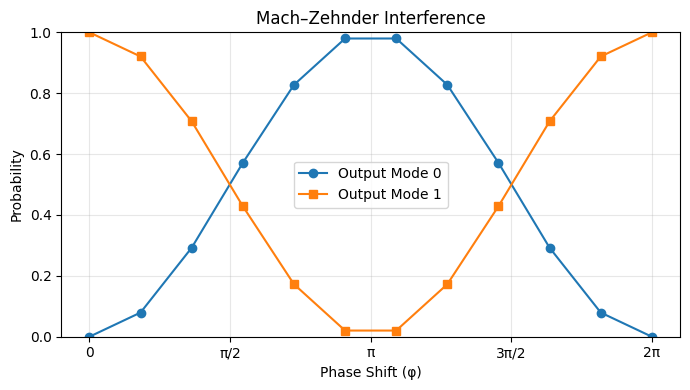

In [18]:
phases, results = mzi(intervals=12)
plot_fringe(phases=phases, results=results)

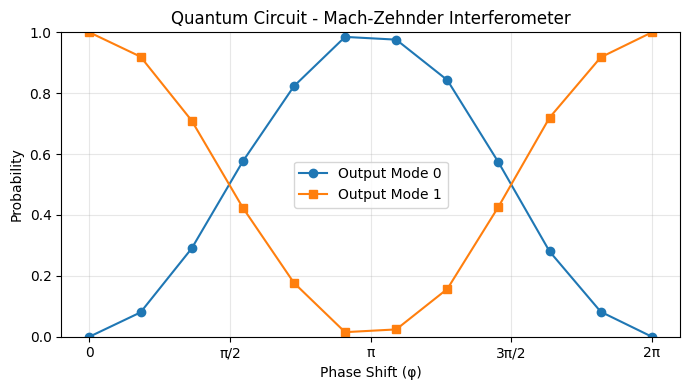

In [19]:
qphases, qresults = mzi_circuit(intervals=12)
plot_fringe(phases=qphases, results=qresults, title="Quantum Circuit - Mach-Zehnder Interferometer")

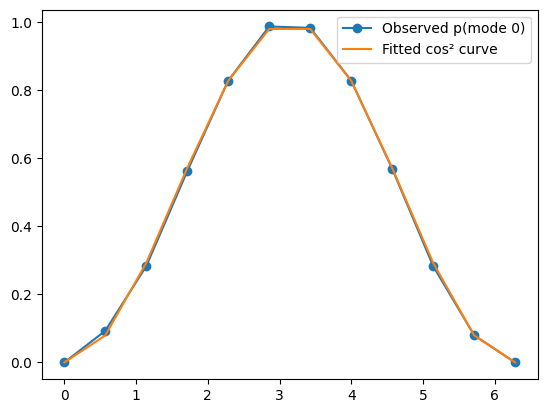

In [20]:
def cos2_model(x, amplitude=1, offset=0, freq=0.5, phase_shift=np.pi/2):
    return offset + amplitude * np.cos(freq * x + phase_shift)**2
qphases, qprobs = mzi_circuit(intervals=12)
plt.plot(qphases, [p[0] for p in qprobs], 'o-', label='Observed p(mode 0)')
plt.plot(qphases, cos2_model(qphases), label='Fitted cos² curve')
plt.legend()
plt.show()


## Michelson Interferometer

The **Michelson interferometer** is historically significant (Michelson–Morley experiment) and physically distinct:

- It uses a single beam splitter twice (split and recombine after reflection from mirrors).
- Despite this hardware difference, its mathematical transformation is equivalent to MZI, producing the same interference fringes.

We include Michelson here as a conceptual bridge to further show the link between physical experiment and qubit simulation.

- Note: We won't re-implement Michelson separately in code, since it reduces to the same BS–phase–BS transformation as MZI.

**Takeaways:**
- Output probabilities oscillate sinusoidally with φ.
- This is (still) directly analogous to qubit interference on the Bloch sphere.

### Run Simulation


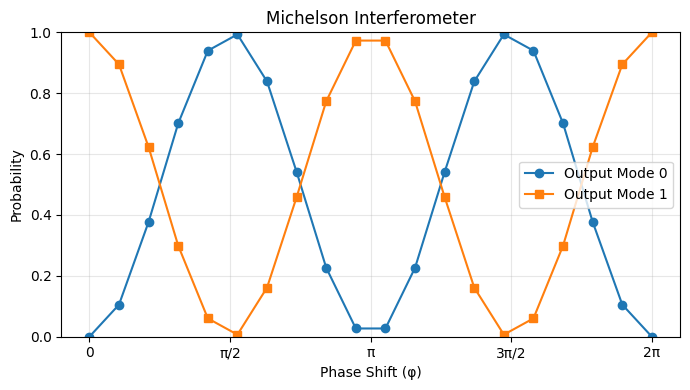

In [21]:
phases, results = michelson(intervals=20)
plot_fringe(phases=phases, results=results, title="Michelson Interferometer")

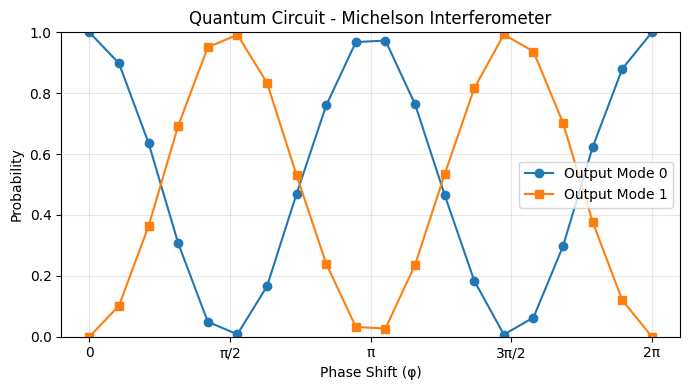

In [22]:
qphases, qresults = michelson_circuit(intervals=20)
plot_fringe(phases=qphases, results=qresults, title="Quantum Circuit - Michelson Interferometer")

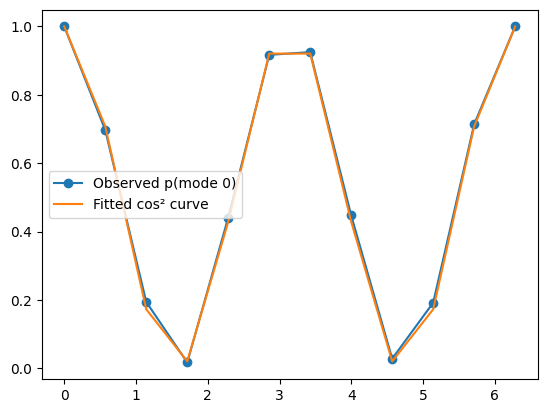

In [23]:
qphases, qprobs = michelson_circuit(intervals=12)
plt.plot(qphases, [p[0] for p in qprobs], 'o-', label='Observed p(mode 0)')
plt.plot(qphases, cos2_model(qphases, freq=1.0, phase_shift=0.0, amplitude=1.0), label='Fitted cos² curve')
plt.legend()
plt.show()

## Ramsey Interferometry (Qubit Analog)

Ramsey interferometry is the qubit equivalent of optical interference:

- A qubit starts in $|0\rangle$.
- A Hadamard gate creates a superposition (analogous to BS splitting paths).
- A phase accumulation step rotates the qubit about $Z$ (analogous to path phase delay).
- A second Hadamard recombines the paths.
- Measuring in the computational basis yields fringes identical to MZI.

    P(∣1⟩) = [1−cos⁡(ϕ)]/2


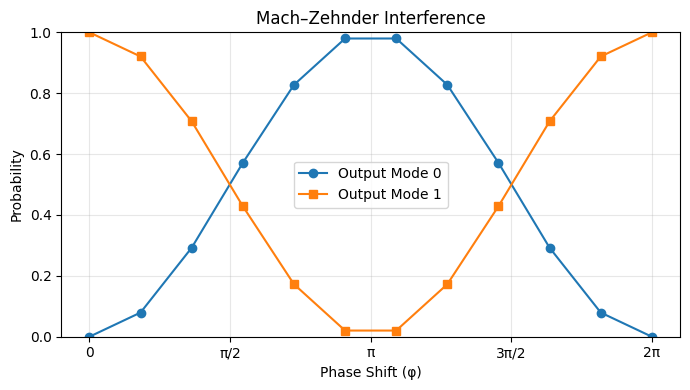

In [24]:
phases, results = ramsey(intervals=12)
plot_fringe(phases=phases, results=results)

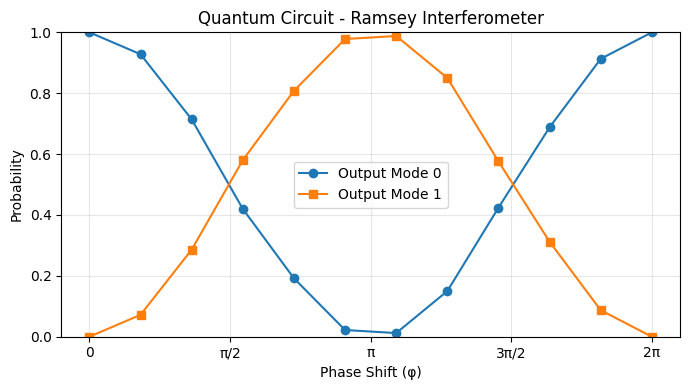

In [25]:
qphases, qresults = ramsey_circuit(intervals=12)
plot_fringe(phases=qphases, results=qresults, title="Quantum Circuit - Ramsey Interferometer")

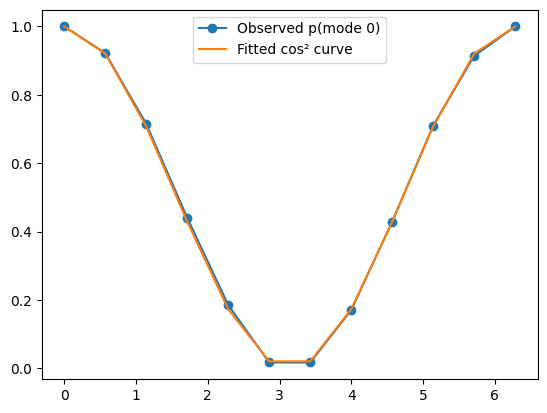

In [26]:
def cos2_model(x, amplitude=1, offset=0, freq=0.5, phase_shift=np.pi/2):
    return offset + amplitude * np.cos(freq * x + phase_shift)**2
qphases, qprobs = ramsey_circuit(intervals=12)
plt.plot(qphases, [p[0] for p in qprobs], 'o-', label='Observed p(mode 0)')
plt.plot(qphases, cos2_model(qphases, phase_shift=0.0), label='Fitted cos² curve')
plt.legend()
plt.show()

## Combined Plot

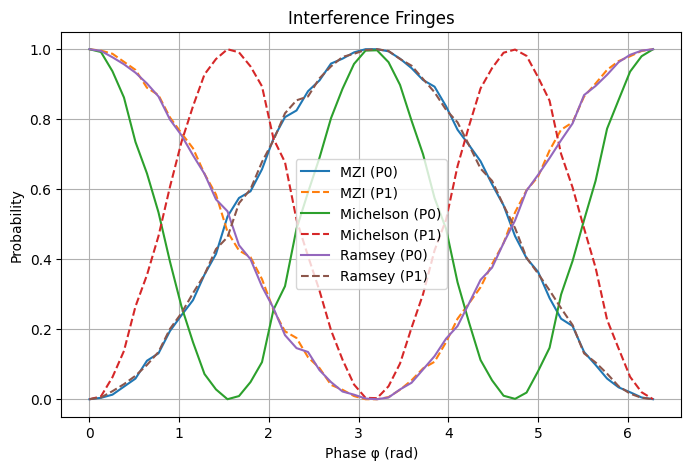

In [27]:
plt.figure(figsize=(8,5))
mzi_circuit(intervals=50, plot=True)
michelson_circuit(intervals=50, plot=True)
ramsey_circuit(intervals=50, plot=True)

plt.xlabel("Phase φ (rad)")
plt.ylabel("Probability")
plt.title("Interference Fringes")
plt.legend()
plt.grid(True)
plt.show()

## Noise and Decoherence in Ramsey

In real systems, qubits experience dephasing ($T_2$), causing Ramsey fringes to lose contrast:

The probability curve dampens over time with the following rule:

P(∣1⟩)=12[1−e−t/T2cos⁡(Δω t)]
P(∣1⟩)=21​[1−e−t/T2​cos(Δωt)]

This demonstrates why coherence is the limiting factor in interferometry-based sensing.
## Run Noisy Ramsey Simulation

In [28]:
# ramsey_noise()

## From Ramsey to Stabilization

The stabilization protocol (from the referenced paper) extends Ramsey:

- During the free evolution (phase accumulation), a continuous control drive is applied.
- This drive dynamically corrects the qubit's phase and preserves coherence.

The Hamiltonian for stabilization is:

H(t)=Δ2σz  +  hy(t)2σy
H(t)=2Δ​σz​+2hy​(t)​σy​

Where:

- $\Delta$ is the detuning (phase evolution rate).

- $h_y(t)$ is a dynamically updated control term based on the Bloch vector.

In a gate-based simulator, we Trotterize this:

Ustab≈∏ke−iδt (Δσz/2)⋅e−iδt (hy(tk)σy/2)
Ustab​≈k∏​e−iδt(Δσz​/2)⋅e−iδt(hy​(tk​)σy​/2)

This breaks continuous control into small $R_z$ and $R_y$ gates applied repeatedly.

In [29]:
# stabilsing protocol

## Applying Stabilization to the Galton Board

Finally, we transfer these insights to our quantum Galton board:

- The control qubit in the Galton board is analogous to the Ramsey qubit.
- Between each "layer" (peg scattering), we apply stabilization pulses derived from Ramsey control.
- This preserves coherence across multiple layers, maintaining ideal binomial or biased distributions even under noise.

Potential Improvements:

- Baseline Galton board output under noise.
- Stabilized Galton board output with Ramsey-inspired control.
- Fidelity and KL divergence comparisons.

In [30]:
# stabilise()

 1. Mach–Zehnder Interferometer (MZI) Simulation

    Quantum Circuit Approach (Qiskit):

        Encode MZI using qubit gates: Hadamards for beam splitters, Rz(ϕ)Rz​(ϕ) for phase shift.

        Benchmark interference fringes by varying phase φ.

    Boson Sampling (Unitary) Simulation:

        Model MZI as a 2×2 unitary UMZI=BS⋅P(ϕ)⋅BSUMZI​=BS⋅P(ϕ)⋅BS.

        Apply directly to mode amplitudes (classical simulation of photonic interference).

    Extension:

        Build multi-layer interferometer arrays (cascaded MZIs), analogous to Galton boards.

        Compare qubit-circuit vs bosonic-mode simulation fidelity.

 2. Classical-Quantum Equivalence Benchmarking

    Goal: Show that Galton boards, Mach–Zehnder interferometers, and Ramsey interferometry are all formally equivalent interference processes.

    Method:

        Map Galton scattering (CSWAP layers) to beam splitters.

        Demonstrate distribution equivalence: Binomial (Galton) ↔ Interference fringes (MZI) ↔ Ramsey oscillations.

 3. Coherence-Stabilized Ramsey Interferometry

    Implement coherence stabilization protocol (from the paper):

        Apply Trotterized evolution under H(t)=Δσz/2+hy(t)σy/2H(t)=Δσz​/2+hy​(t)σy​/2.

        Dynamically update hy(t)hy​(t) from Bloch vector components.

    Benchmark:

        Compare stabilized vs standard Ramsey sequences for sensitivity and SNR.

        Test robustness with noise models (T1/T2 decoherence).

 4. Hybrid Stabilization in Galton Boards

    Key Idea: Treat the Galton board’s control qubit as analogous to the Ramsey qubit.

    Method:

        Between scattering layers, insert stabilization pulses (Trotterized RzRz​ and RyRy​ gates).

        Dynamically compute hy(t)hy​(t) from the control qubit’s Bloch state (feedback-based correction).

    Outcome:

        Maintain ideal distributions over deeper boards under noise.

        Directly connect sensing control techniques to interferometric transport models.